# Modeling Workbook

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from math import sqrt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, explained_variance_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import IsolationForest, RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
from prepare import handle_nulls, set_index
from preprocessing import spotify_split, split_df, scale_data, modeling_prep

---
# Wrangle

In [3]:
df = modeling_prep()
#df = df.drop(columns=['release_year', 'release_month', 'release_day', 'duration_minutes', 'duration_seconds'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5733 entries, 6mecZbKK3JDeMdFRNxsCV5 to 2gVtrY8gCCynR9v0lyBL1m
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   danceability        5733 non-null   float64
 1   energy              5733 non-null   float64
 2   key                 5733 non-null   int64  
 3   loudness            5733 non-null   float64
 4   mode                5733 non-null   int64  
 5   speechiness         5733 non-null   float64
 6   instrumentalness    5733 non-null   float64
 7   liveness            5733 non-null   float64
 8   valence             5733 non-null   float64
 9   tempo               5733 non-null   float64
 10  duration_ms         5733 non-null   int64  
 11  time_signature      5733 non-null   int64  
 12  popularity          5733 non-null   int64  
 13  disc_number         5733 non-null   int64  
 14  track_number        5733 non-null   int64  
 15  is_featured_artist  5

In [5]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,disc_number,track_number,is_featured_artist,is_explicit,top_ten_label,compilation,single
track_id,,,,,,,,,,,,,,,,,,,,
6mecZbKK3JDeMdFRNxsCV5,0.792,0.594,2,-8.544,1,0.3000,0.000000,0.244,0.351,82.512,232803,4,43,1,1,0,1,0,0,1
5PtMwNq8Dp31uYdGGacVJE,0.816,0.578,9,-6.912,1,0.2330,0.000000,0.114,0.265,148.077,193920,4,61,1,11,0,1,0,0,0
6s8EhlBn2PIoESylkXnwYc,0.649,0.798,0,-6.450,0,0.1450,0.000000,0.409,0.717,160.011,254390,4,23,1,11,0,1,0,0,0
2e9EZ2V5QGGZPMJacO3y0Y,0.705,0.702,0,-4.783,0,0.1080,0.000000,0.364,0.771,140.059,250493,4,62,1,9,1,1,0,0,0
3ZRd5Z0fiYtASLdEPPb16m,0.838,0.793,11,-5.470,0,0.0773,0.000001,0.106,0.800,160.003,261933,4,45,1,5,1,1,0,0,0


In [6]:
# split the data
X_train, y_train, X_validate, y_validate, X_test, y_test, train, validate, test = spotify_split(df, 'popularity')
X_train.head(3)

Shape of train: (4012, 19) | Shape of validate: (861, 19) | Shape of test: (860, 19)
Percent train: 70.0        | Percent validate: 15.0       | Percent test: 15.0


,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,disc_number,track_number,is_featured_artist,is_explicit,top_ten_label,compilation,single
track_id,,,,,,,,,,,,,,,,,,,
30bqVoKjX479ab90a8Pafp,0.585,0.471,4,-9.934,0,0.0616,0.0184,0.115,0.323,93.099,142000,4,1,1,0,1,0,0,1
0HO8pCseEpgozNi3z0R4bc,0.833,0.518,10,-10.126,0,0.3490,0.0000,0.635,0.773,180.008,120000,4,1,11,0,1,0,0,0
643K3eEgRvdJiXjSzlz7dg,0.471,0.671,1,-6.050,1,0.3410,0.0000,0.308,0.850,176.863,252293,4,1,2,0,1,0,0,0


### Scale the Data

In [7]:
# MIN-MAX
X_train_mm, X_validate_mm, X_test_mm = scale_data(train, validate, test, 'popularity', 'MinMax')
X_train_mm.head(3)

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,disc_number,track_number,is_featured_artist,is_explicit,top_ten_label,compilation,single
track_id,,,,,,,,,,,,,,,,,,,
30bqVoKjX479ab90a8Pafp,0.593306,0.439493,0.363636,0.580823,0.0,0.064033,0.019127,0.101302,0.328921,0.422695,0.234238,0.8,0.0,0.000000,0.0,1.0,0.0,0.0,1.0
0HO8pCseEpgozNi3z0R4bc,0.844828,0.489960,0.909091,0.572667,0.0,0.362786,0.000000,0.651741,0.787169,0.817286,0.194025,0.8,0.0,0.163934,0.0,1.0,0.0,0.0,0.0
643K3eEgRvdJiXjSzlz7dg,0.477688,0.654247,0.090909,0.745826,1.0,0.354470,0.000000,0.305600,0.865580,0.803007,0.435841,0.8,0.0,0.016393,0.0,1.0,0.0,0.0,0.0


In [8]:
# STANDARD
X_train_st, X_validate_st, X_test_st = scale_data(train, validate, test, 'popularity', 'Standard')
X_train_st.head(3)

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,disc_number,track_number,is_featured_artist,is_explicit,top_ten_label,compilation,single
track_id,,,,,,,,,,,,,,,,,,,
30bqVoKjX479ab90a8Pafp,-1.141565,-1.268085,-0.339151,-1.067607,-1.163813,-1.181987,0.066028,-0.549742,-0.920728,-0.910300,-1.034289,0.035151,-0.069991,-0.906926,-0.435659,0.473199,-0.412335,-0.199117,1.591129
0HO8pCseEpgozNi3z0R4bc,0.718917,-0.963715,1.257884,-1.136469,-1.163813,0.794312,-0.156452,2.687177,1.134316,1.964906,-1.395779,0.035151,-0.069991,1.092518,-0.435659,0.473199,-0.412335,-0.199117,-0.628485
643K3eEgRvdJiXjSzlz7dg,-1.996786,0.027106,-1.137669,0.325429,0.859245,0.739300,-0.156452,0.651653,1.485956,1.860860,0.777980,0.035151,-0.069991,-0.706982,-0.435659,0.473199,-0.412335,-0.199117,-0.628485


In [9]:
# ROBUST
X_train_rb, X_validate_rb, X_test_rb = scale_data(train, validate, test, 'popularity', 'Robust')
X_train_rb.head(3)

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,disc_number,track_number,is_featured_artist,is_explicit,top_ten_label,compilation,single
track_id,,,,,,,,,,,,,,,,,,,
30bqVoKjX479ab90a8Pafp,-1.141565,-1.268085,-0.339151,-1.067607,-1.163813,-1.181987,0.066028,-0.549742,-0.920728,-0.910300,-1.034289,0.035151,-0.069991,-0.906926,-0.435659,0.473199,-0.412335,-0.199117,1.591129
0HO8pCseEpgozNi3z0R4bc,0.718917,-0.963715,1.257884,-1.136469,-1.163813,0.794312,-0.156452,2.687177,1.134316,1.964906,-1.395779,0.035151,-0.069991,1.092518,-0.435659,0.473199,-0.412335,-0.199117,-0.628485
643K3eEgRvdJiXjSzlz7dg,-1.996786,0.027106,-1.137669,0.325429,0.859245,0.739300,-0.156452,0.651653,1.485956,1.860860,0.777980,0.035151,-0.069991,-0.706982,-0.435659,0.473199,-0.412335,-0.199117,-0.628485


--- 
# Feature Selection

In [10]:
# SELECT K BEST
from sklearn.feature_selection import SelectKBest, f_regression

In [11]:
f_selector = SelectKBest(f_regression, 5)
f_selector.fit(X_train_mm, y_train)
f_mask = f_selector.get_support()
X_train_scaled_f_reduced = X_train_mm.iloc[:,f_mask]
X_train_scaled_f_reduced.head(1)

,track_number,is_featured_artist,is_explicit,top_ten_label,single
track_id,,,,,
30bqVoKjX479ab90a8Pafp,0.0,0.0,1.0,0.0,1.0


In [12]:
skb_features = X_train_scaled_f_reduced

In [13]:
#RFE
from sklearn.feature_selection import RFE

In [14]:
# creat3 the ML model object
lm = LinearRegression()
# create the rfe object
rfe = RFE(lm, 5)
# fit the rfe
rfe.fit(X_train_mm, y_train)
# get the feature support boolean list
rfe_mask = rfe.support_
# reduce the dataframe to just those features
X_train_scaled_rfe_reduced = X_train_mm.iloc[:,rfe_mask]
X_train_scaled_rfe_reduced.head(1)

,energy,loudness,disc_number,track_number,top_ten_label
track_id,,,,,
30bqVoKjX479ab90a8Pafp,0.439493,0.580823,0.0,0.0,0.0


In [15]:
rfe_features = X_train_scaled_rfe_reduced

In [16]:
def select_kbest(X, y, n):
    from sklearn.feature_selection import SelectKBest, f_regression
    f_selector = SelectKBest(f_regression, k=n).fit(X, y)
    X_reduced = f_selector.transform(X)
    f_support = f_selector.get_support()
    f_feature = X.iloc[:,f_support].columns.tolist()
    return f_feature

def rfe(X, y, n):
    from sklearn.feature_selection import RFE
    from sklearn.linear_model import LinearRegression
    lm = LinearRegression()
    rfe = RFE(lm, n)
    X_rfe = rfe.fit_transform(X, y)
    mask = rfe.support_
    X_reduced_scaled_rfe = X.iloc[:,mask]
    f_feature = X_reduced_scaled_rfe.columns.tolist()
    return f_feature

In [17]:
select_kbest(X_train_mm, y_train, 5)

['track_number',
 'is_featured_artist',
 'is_explicit',
 'top_ten_label',
 'single']

In [18]:
rfe(X_train_mm, y_train, 5)

['energy', 'loudness', 'disc_number', 'track_number', 'top_ten_label']

--- 
# Set the baseline

In [19]:
baseline = np.mean(y_train)
baseline

38.33150548354935

In [20]:
bl_train_rmse = round(sqrt(mean_squared_error(y_train, np.full(len(y_train), baseline))), 6)
print('RMSE (Root Mean Square Error) of Baseline on train data:\n', bl_train_rmse)

#bl_validate_rmse = round(sqrt(mean_squared_error(y_validate, np.full(len(y_validate), baseline))), 6)
#print('RMSE (Root Mean Square Error) of Baseline on validate data:\n', bl_validate_rmse)

#bl_test_rmse = round(sqrt(mean_squared_error(y_test, np.full(len(y_test), baseline))), 6)
#print('RMSE (Root Mean Square Error) of Baseline on test data:\n', bl_test_rmse)

RMSE (Root Mean Square Error) of Baseline on train data:
 22.897138


---
# MODELS

---
### Cross Validation

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
# OLS CV
params = {'fit_intercept': [True, False]}

lm = LinearRegression()

grid = GridSearchCV(lm, params, 
                    scoring= 'neg_root_mean_squared_error', 
                    cv=3, iid=True)

grid.fit(X_train_mm, y_train)

results = grid.cv_results_
#results.keys()

params = results['params']
test_scores = results['mean_test_score']

for p, s in zip(params, test_scores):
    p['RMSE'] = s

pd.DataFrame(params).sort_values(by='RMSE', ascending=False)

,fit_intercept,RMSE
0,True,-21.166736
1,False,-21.195705


In [23]:
# Lasso Lars CV
params = {'fit_intercept': [True, False],
          'alpha': [.0001, .001, .01]
         }
          
lars = LassoLars()

grid = GridSearchCV(lars, params, 
                    scoring= 'neg_root_mean_squared_error', 
                    cv=3, iid=True)

grid.fit(X_train_mm, y_train)

results = grid.cv_results_
#results.keys()

params = results['params']
test_scores = results['mean_test_score']

for p, s in zip(params, test_scores):
    p['RMSE'] = s

pd.DataFrame(params).sort_values(by='RMSE', ascending=False)

,alpha,fit_intercept,RMSE
2,0.0010,True,-21.163475
0,0.0001,True,-21.166312
5,0.0100,False,-21.192269
3,0.0010,False,-21.195153
1,0.0001,False,-21.195646
4,0.0100,True,-21.212186


In [24]:
def PolynomialRegression(degree=2, interaction_only=False, include_bias=True, order='C', **kwargs):
    from sklearn.pipeline import make_pipeline
    return make_pipeline(PolynomialFeatures(degree, interaction_only, include_bias, order),
                         LinearRegression(**kwargs))

In [25]:
PolynomialRegression().get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'polynomialfeatures', 'linearregression', 'polynomialfeatures__degree', 'polynomialfeatures__include_bias', 'polynomialfeatures__interaction_only', 'polynomialfeatures__order', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

In [26]:
PolynomialRegression()

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [27]:
from sklearn.svm import SVR
params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
          'gamma': ['scale', 'auto']
         }
          
svr = SVR()

grid = GridSearchCV(svr, params, 
                    scoring= 'neg_root_mean_squared_error', 
                    cv=3, iid=True)

grid.fit(X_train_mm, y_train)

results = grid.cv_results_
#results.keys()

params = results['params']
test_scores = results['mean_test_score']

for p, s in zip(params, test_scores):
    p['RMSE'] = s

pd.DataFrame(params).sort_values(by='RMSE', ascending=False)

,gamma,kernel,RMSE
1,scale,poly,-21.268774
0,scale,linear,-21.295644
4,auto,linear,-21.295644
2,scale,rbf,-21.420742
6,auto,rbf,-21.657936
7,auto,sigmoid,-21.877889
3,scale,sigmoid,-22.305455
5,auto,poly,-22.553607


In [28]:
params = {'power': [0, 1], 
          'alpha': [0, .5, 1, 2],
          'link': ['auto', 'identity', 'log']
         }
          
svr = TweedieRegressor()

grid = GridSearchCV(svr, params, 
                    scoring= 'neg_root_mean_squared_error', 
                    cv=3, iid=True)

grid.fit(X_train_mm, y_train)

results = grid.cv_results_
#results.keys()

params = results['params']
test_scores = results['mean_test_score']

for p, s in zip(params, test_scores):
    p['RMSE'] = s

pd.DataFrame(params).sort_values(by='RMSE', ascending=False)

,alpha,link,power,RMSE
0,0.0,auto,0,-21.166779
2,0.0,identity,0,-21.166779
3,0.0,identity,1,-21.171029
10,0.5,log,0,-21.234914
16,1.0,log,0,-21.236107
4,0.0,log,0,-21.236125
22,2.0,log,0,-21.242504
5,0.0,log,1,-21.248638
1,0.0,auto,1,-21.248638
7,0.5,auto,1,-21.377009


---
## Train and Evaluate
### OLS Model
- all features
- min-max scaler

In [29]:
lm = LinearRegression(normalize=True)
lm.fit(X_train_mm, y_train)
lm_pred = lm.predict(X_train_mm)
lm_rmse = sqrt(mean_squared_error(y_train, lm_pred))

lm_pred_v = lm.predict(X_validate_mm)
lm_rmse_v = sqrt(mean_squared_error(y_validate, lm_pred_v))

print('RMSE for OLS using Linear Regression \n')
print('On train data:\n', round(lm_rmse, 6), '\n') 
#print('On validate data:\n', round(lm_rmse_v, 6))

RMSE for OLS using Linear Regression 

On train data:
 21.030195 



### OLS Model
- select k best features (top 5)
- min-max scaler

In [30]:
lm = LinearRegression(normalize=True)
lm.fit(skb_features, y_train)
lm_pred = lm.predict(skb_features)
lm_rmse = sqrt(mean_squared_error(y_train, lm_pred))

lm_pred_v = lm.predict(X_validate_mm[skb_features.columns.to_list()])
lm_rmse_v = sqrt(mean_squared_error(y_validate, lm_pred_v))

print('RMSE for OLS using Linear Regression \n')
print('On train data:\n', round(lm_rmse, 6), '\n') 
#print('On validate data:\n', round(lm_rmse_v, 6))

RMSE for OLS using Linear Regression 

On train data:
 21.568059 



---
### OLS Model
- RFE features (top 5)
- min-max scaler

In [31]:
lm = LinearRegression(normalize=True)
lm.fit(rfe_features, y_train)
lm_pred = lm.predict(rfe_features)
lm_rmse = sqrt(mean_squared_error(y_train, lm_pred))

lm_pred_v = lm.predict(X_validate_mm[rfe_features.columns.to_list()])
lm_rmse_v = sqrt(mean_squared_error(y_validate, lm_pred_v))

print('RMSE for OLS using Linear Regression \n')
print('On train data:\n', round(lm_rmse, 6), '\n') 
#print('On validate data:\n', round(lm_rmse_v, 6))

RMSE for OLS using Linear Regression 

On train data:
 21.550971 



<div class="alert alert-block alert-info">
    <b>Takeaways</b>: using the feature selectors (opposed to using all features) and selecting the top 5 features doesn't improve model performance.</div>

### Lasso + Lars
- all features
- min-max-scaler
- alpha=0.1

In [32]:
lars = LassoLars(alpha=.001)
lars.fit(X_train_mm, y_train)

lars_pred = lars.predict(X_train_mm)
lars_rmse = sqrt(mean_squared_error(y_train, lars_pred))

lars_pred_v = lars.predict(X_validate_mm)
lars_rmse_v = sqrt(mean_squared_error(y_validate, lars_pred_v))

print('RMSE for LASSO + LARS \n')
print('On train data:\n', round(lars_rmse, 6), '\n') 
#print('On validate data:\n', round(lars_rmse_v, 6))

RMSE for LASSO + LARS 

On train data:
 21.032084 



In [33]:
# smaller alpha
lars = LassoLars(alpha=.00001, fit_intercept=False)
lars.fit(X_train_mm, y_train)

lars_pred = lars.predict(X_train_mm)
lars_rmse = sqrt(mean_squared_error(y_train, lars_pred))

lars_pred_v = lars.predict(X_validate_mm)
lars_rmse_v = sqrt(mean_squared_error(y_validate, lars_pred_v))

lars_pred_t = lars.predict(X_test_mm)###
lars_rmse_t = sqrt(mean_squared_error(y_test, lars_pred_t))###

print('RMSE for LASSO + LARS \n')
print('On train data:\n', round(lars_rmse, 6), '\n') 
#print('On validate data:\n', round(lars_rmse_v, 6))

RMSE for LASSO + LARS 

On train data:
 21.067037 



### Polynomial Features + Linear Regression

In [34]:
#squared
pf = PolynomialFeatures(degree=2)
X_train_sq = pf.fit_transform(X_train_mm)
X_validate_sq = pf.transform(X_validate_mm)

lm_sq = LinearRegression()
lm_sq.fit(X_train_sq, y_train)

lm_sq_pred = lm_sq.predict(X_train_sq)
lm_sq_rmse = sqrt(mean_squared_error(y_train, lm_sq_pred))

lm_sq_pred_v = lm_sq.predict(X_validate_sq)
lm_sq_rmse_v = sqrt(mean_squared_error(y_validate, lm_sq_pred_v))

print('RMSE for Polynomial Squared + Linear Regression \n')
print('On train data:\n', round(lm_sq_rmse, 6), '\n') 
#print('On validate data:\n', round(lm_sq_rmse_v, 6))

RMSE for Polynomial Squared + Linear Regression 

On train data:
 20.213495 



In [47]:
# cubed
pf = PolynomialFeatures(degree=3)
X_train_cb = pf.fit_transform(X_train_mm)
X_validate_cb = pf.transform(X_validate_mm)

lm_cb = LinearRegression()
lm_cb.fit(X_train_cb, y_train)

lm_cb_pred = lm_cb.predict(X_train_cb)
lm_cb_rmse = sqrt(mean_squared_error(y_train, lm_cb_pred))

lm_cb_pred_v = lm_cb.predict(X_validate_cb)
lm_cb_rmse_v = sqrt(mean_squared_error(y_validate, lm_cb_pred_v))

print('RMSE for Polynomial Squared + Linear Regression \n')
print('On train data:\n', round(lm_cb_rmse, 6), '\n') 
print('On validate data:\n', round(lm_cb_rmse_v, 6))

RMSE for Polynomial Squared + Linear Regression 

On train data:
 17.238021 

On validate data:
 288.313542


### Support Vector Regression with RBF Kernel

In [36]:
def svr_model(X_tr, y_tr, X_v, y_v, kern_str, **kwargs):
    from sklearn.svm import SVR
    # most important SVR parameter is Kernel type.
    # It can be linear, polynomial, or gaussian SVR.
    # We have a non-linear condition so we can select polynomial or gaussian
    # but here we select RBF (a gaussian type) kernel.

    # create the model object
    svr = SVR(**kwargs)

    # fit the model to our training data
    svr.fit(X_tr, y_tr)

    # predict on train
    svr_pred = svr.predict(X_tr)
    # compute root mean squared error
    svr_rmse = sqrt(mean_squared_error(y_tr, svr_pred))

    # predict on validate
    svr_pred_v = svr.predict(X_v)
    # compute root mean squared error
    svr_rmse_v = sqrt(mean_squared_error(y_v, svr_pred_v))

    print(f'RMSE for SVR using {kern_str} Kernel \n')
    print('On train data:\n', round(svr_rmse, 6), '\n')
    print(svr_rmse_v)
    return svr_rmse, svr_rmse_v

In [37]:
svr_rmse, svr_rmse_v = svr_model(X_train_mm, y_train, X_validate_mm, y_validate, 'RBF', kernel='rbf', gamma='scale')

RMSE for SVR using RBF Kernel 

On train data:
 21.121161 

21.27271710059012


### General Linear Model

In [38]:
def glm_model(X_tr, y_tr, X_v, y_v, X_te, y_te, d_str, **kwargs):
    '''
    Generalized Linear Model with a Tweedie distribution.
    This estimator can be used to model different GLMs depending 
    on the power parameter, which determines the underlying distribution.
    '''
    # create the model object
    glm = TweedieRegressor(**kwargs)

    # fit the model to our training data
    glm.fit(X_tr, y_tr)

    # predict on train
    glm_pred = glm.predict(X_tr)
    # compute root mean squared error
    glm_rmse = sqrt(mean_squared_error(y_tr, glm_pred))

    # predict on validate
    glm_pred_v = glm.predict(X_v)
    # compute root mean squared error
    glm_rmse_v = sqrt(mean_squared_error(y_v, glm_pred_v))

    # predict on test
    glm_pred_t = glm.predict(X_te)
    # compute root mean squared error
    glm_rmse_t = sqrt(mean_squared_error(y_te, glm_pred_t))
    print(f'RMSE for GLM using {d_str} Distribution \n')
    print('On train data:\n', round(glm_rmse, 6), '\n')
    print(glm_rmse_v)
    return glm_rmse, glm_rmse_v, glm_rmse_t, glm_pred_t

In [39]:
glm_rmse, glm_rmse_v, glm_rmse_t, glm_pred_t = glm_model(X_train_mm, y_train, X_validate_mm, y_validate, X_test_mm, y_test, 'Normal', alpha=0, link='auto', power=0)

RMSE for GLM using Normal Distribution 

On train data:
 21.030195 

21.04028155251899


In [40]:
columns = ['train_rmse', 'validate_rmse', 'test_rmse']
index = ['baseline', 'ols', 'lassolars', 'pf2_lr', 'SVM', 'GLM']
data = [[bl_train_rmse, '-', '-'],
        [lm_rmse, '-', '-'],
        [lars_rmse, lars_rmse_v, '-'],
        [lm_sq_rmse, lm_sq_rmse_v, '-'], 
        [svr_rmse, '-', '-'],
        [glm_rmse, glm_rmse_v, glm_rmse_t]]
pd.DataFrame(columns=columns, data=data, index=index).sort_values(by='train_rmse')

,train_rmse,validate_rmse,test_rmse
pf2_lr,20.213495,21.3664,-
GLM,21.030195,21.0403,20.99
lassolars,21.067037,21.0434,-
SVM,21.121161,-,-
ols,21.550971,-,-
baseline,22.897138,-,-


In [41]:
print(
    f'Model beat baseline by {abs((glm_rmse_t - bl_train_rmse)/bl_train_rmse)*100:.2f}%')

Model beat baseline by 8.33%


# Key Takeaways:

<div class="alert alert-block alert-info">
    <li>Polynomial features cubed is way overfit since validate rmse is over 288</li>
    <li>Polynomial features squared may be a bit overfit since validate rmse is lower</li>
    <li>General Linear Model with Normal Distribution and Lasso lars perform best on train and validate</li>
    <li><b>Best Model</b> is GLM since it performed better and more consistently across train and validate data
    <li>Beat the baseline but barely.</li>
    </div>

---
Test Functions

In [42]:
from model import evaluate_df, glm_model, glm_model, visualize_error, visualize_model

In [43]:
evaluate_df(bl_train_rmse, lm_rmse, lars_rmse, lars_rmse_v, lars_rmse_t, lm_sq_rmse, lm_sq_rmse_v, lm_cb_rmse, lm_cb_rmse_v, svr_rmse, glm_rmse, glm_rmse_v, glm_rmse_t)

Model beat baseline by 8.33%


,train_rmse,validate_rmse,test_rmse
pf2_lr,20.213495,21.3664,-
GLM,21.030195,21.0403,20.99
lassolars,21.067037,21.0434,-
SVM,21.121161,-,-
ols,21.550971,-,-
baseline,22.897138,-,-


In [44]:
glm_rmse, glm_rmse_v, glm_rmse_t, glm_pred_t = glm_model(X_train_mm, y_train, X_validate_mm, y_validate, X_test_mm, y_test, 'Normal', alpha=0, link='auto', power=0)

RMSE for GLM using Normal Distribution 

On train data:
 21.030195 

21.04028155251899


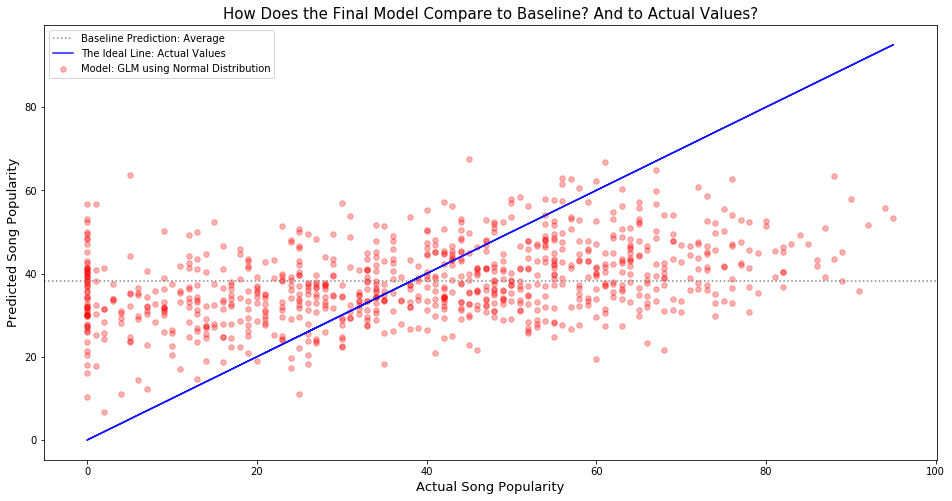

In [45]:
visualize_model(glm_pred_t, y_test, baseline, 'GLM using Normal Distribution')

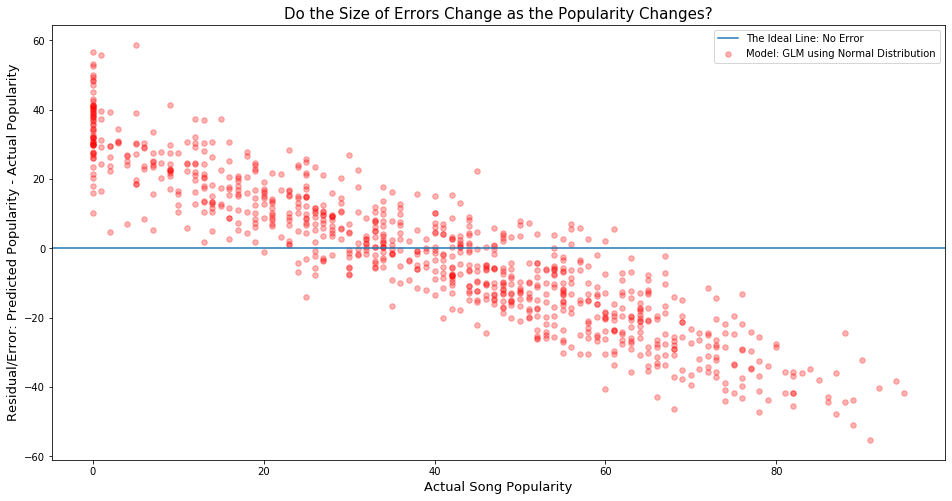

In [46]:
visualize_error(glm_pred_t, y_test, baseline, 'GLM using Normal Distribution')